In [8]:
import sys

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')
from compute_similarity import compute_similarity
from k_axial_distribution import k_axial_distribution
from atlas_distribution import atlas_distribution


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path
import json
import random

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load configuration file

In [17]:
with open('../config/config_NK.json') as config_file:
    config = json.load(config_file)

In [36]:
dist_test,labels = atlas_distribution(config,'icap',15)

ATLAS DISTRIBUTION
...Opening atlas files
...Opening component files
...Computing voxels counts
DONE!


In [21]:
dist_test.shape

(15, 296)

In [20]:
labels.split("\n")

["1 'Frontal-to-Temporal-I (GapMap) left'",
 "2 'Frontal-to-Temporal-I (GapMap) right'",
 "3 'Ch 123 (Basal Forebrain) left'",
 "4 'Ch 123 (Basal Forebrain) right'",
 "5 'Ch 4 (Basal Forebrain) left'",
 "6 'Ch 4 (Basal Forebrain) right'",
 "7 'LB (Amygdala) left'",
 "8 'LB (Amygdala) right'",
 "9 'CM (Amygdala) left'",
 "10 'CM (Amygdala) right'",
 "11 'SF (Amygdala) left'",
 "12 'SF (Amygdala) right'",
 "13 'VTM (Amygdala) left'",
 "14 'VTM (Amygdala) right'",
 "15 'IF (Amygdala) left'",
 "16 'IF (Amygdala) right'",
 "17 'MF (Amygdala) left'",
 "18 'MF (Amygdala) right'",
 "19 'BST (Bed Nucleus) left'",
 "20 'BST (Bed Nucleus) right'",
 "21 'Area 5L (SPL) left'",
 "22 'Area 5L (SPL) right'",
 "23 'Area 7M (SPL) left'",
 "24 'Area 7M (SPL) right'",
 "25 'Area 7PC (SPL) left'",
 "26 'Area 7PC (SPL) right'",
 "27 'Area 5M (SPL) left'",
 "28 'Area 5M (SPL) right'",
 "29 'Area 7P (SPL) left'",
 "30 'Area 7P (SPL) right'",
 "31 'Area 5Ci (SPL) left'",
 "32 'Area 5Ci (SPL) right'",
 "33 'Are

In [27]:
[f'iCAP {i}' for i in range(1, 16)]

['iCAP 1',
 'iCAP 2',
 'iCAP 3',
 'iCAP 4',
 'iCAP 5',
 'iCAP 6',
 'iCAP 7',
 'iCAP 8',
 'iCAP 9',
 'iCAP 10',
 'iCAP 11',
 'iCAP 12',
 'iCAP 13',
 'iCAP 14',
 'iCAP 15']

In [37]:
import pandas as pd
df = pd.DataFrame(data = dist_test, 
                  index = [f'iCAP {i}' for i in range(1, 16)], 
                  columns = labels.split('\n'))

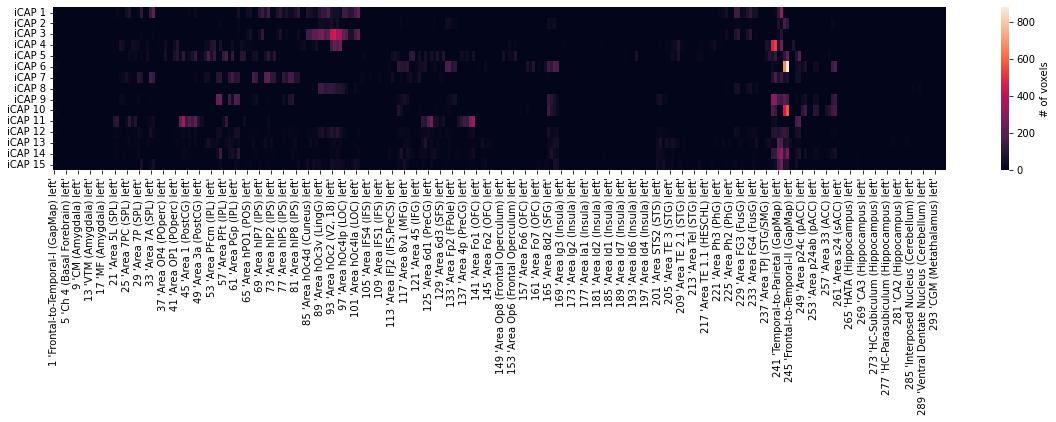

In [54]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.heatmap(data=df,cbar_kws={'label': '# of voxels'});